In [6]:
import os

# Check current location
print("Current directory:", os.getcwd())

# Move up one level to project root
os.chdir('..')
print("New directory:", os.getcwd())
print("Files here:", os.listdir())


Current directory: /Users/prasadkurapati/Desktop/projects/hospital-readmission-prediction/notebooks
New directory: /Users/prasadkurapati/Desktop/projects/hospital-readmission-prediction
Files here: ['.DS_Store', 'LICENSE', 'requirements.txt', 'README.md', 'readmission-env', '.ipynb_checkpoints', '.git', 'data', 'notebooks']


In [7]:
# Create data directories
os.makedirs('data/raw', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)

print("Folders created!")
print("Project structure:")
for folder in ['data', 'notebooks', 'data/raw', 'data/processed']:
    if os.path.exists(folder):
        print(f"  {folder}/")

Folders created!
Project structure:
  data/
  notebooks/
  data/raw/
  data/processed/


In [8]:
import shutil

# Look for the dataset file
print("Looking for diabetic_data.csv...")

# Check common locations
possible_locations = [
    'diabetic_data.csv',
    'notebooks/diabetic_data.csv', 
    '../diabetic_data.csv',
    '~/Downloads/diabetic_data.csv'
]

found = False
for location in possible_locations:
    if os.path.exists(os.path.expanduser(location)):
        print(f"Found at: {location}")
        
        # Move to correct location
        shutil.copy(os.path.expanduser(location), 'data/raw/diabetic_data.csv')
        print("Copied to data/raw/diabetic_data.csv")
        found = True
        break

if not found:
    print("Dataset not found automatically.")
    print("Let me check your Downloads folder...")
    downloads = os.path.expanduser('~/Downloads')
    if os.path.exists(downloads):
        files = [f for f in os.listdir(downloads) if 'diabetic' in f.lower()]
        print(f"Found these files in Downloads: {files}")


Looking for diabetic_data.csv...
Dataset not found automatically.
Let me check your Downloads folder...
Found these files in Downloads: []


In [9]:
# Now load the dataset from correct location
df = pd.read_csv('data/raw/diabetic_data.csv')

print("SUCCESS! Dataset loaded!")
print(f"Shape: {df.shape}")
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print("\nFirst few rows:")
df.head()


SUCCESS! Dataset loaded!
Shape: (101766, 50)
Total rows: 101,766
Total columns: 50

First few rows:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [17]:
# Basic statistics
print(df.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [16]:
# Check missing values
print(df.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [15]:
# Readmission distribution
print(df['readmitted'].value_counts())

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Total encounters: {len(df):,}")
print(f"Total features: {len(df.columns)}")
print(f"Date range: Check encounter_id patterns")
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


DATASET OVERVIEW
Total encounters: 101,766
Total features: 50
Date range: Check encounter_id patterns

Dataset shape: (101766, 50)

First few rows:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Target Variable Analysis (CRITICAL)


TARGET VARIABLE: READMITTED

Readmission Status Distribution:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Percentages:
readmitted
NO     53.91
>30    34.93
<30    11.16
Name: proportion, dtype: float64


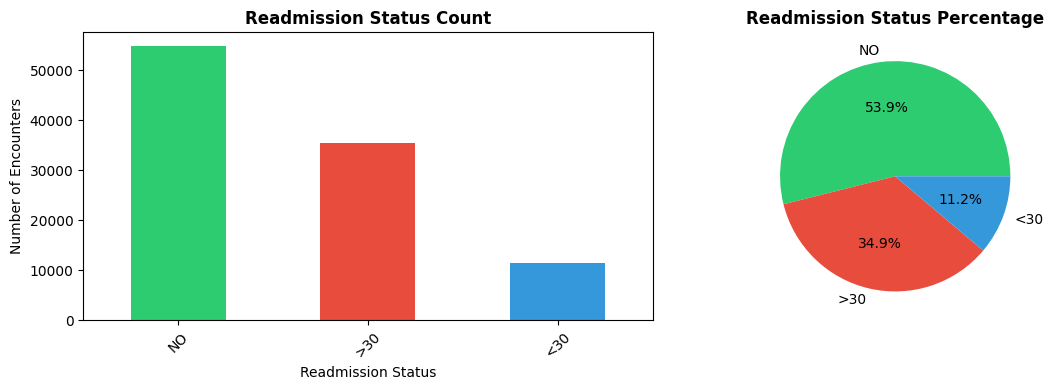


 IMPORTANT: Only 11% readmitted within 30 days - class imbalance!


In [31]:
print("\n" + "="*60)
print("TARGET VARIABLE: READMITTED")
print("="*60)

# Check readmission values
print("\nReadmission Status Distribution:")
readmit_counts = df['readmitted'].value_counts()
print(readmit_counts)

print("\nPercentages:")
readmit_pct = df['readmitted'].value_counts(normalize=True) * 100
print(readmit_pct.round(2))

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
readmit_counts.plot(kind='bar', ax=ax[0], color=['#2ecc71', '#e74c3c', '#3498db'])
ax[0].set_title('Readmission Status Count', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Number of Encounters')
ax[0].set_xlabel('Readmission Status')
ax[0].tick_params(axis='x', rotation=45)

# Pie chart
colors = ['#2ecc71', '#e74c3c', '#3498db']
ax[1].pie(readmit_counts, labels=readmit_counts.index, autopct='%1.1f%%', colors=colors)
ax[1].set_title('Readmission Status Percentage', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n IMPORTANT: Only 11% readmitted within 30 days - class imbalance!")

Missing Values Analysis


MISSING VALUES ANALYSIS

Columns with Missing Values:
       Column  Missing_Count  Missing_Percentage
max_glu_serum          96420               94.75
    A1Cresult          84748               83.28


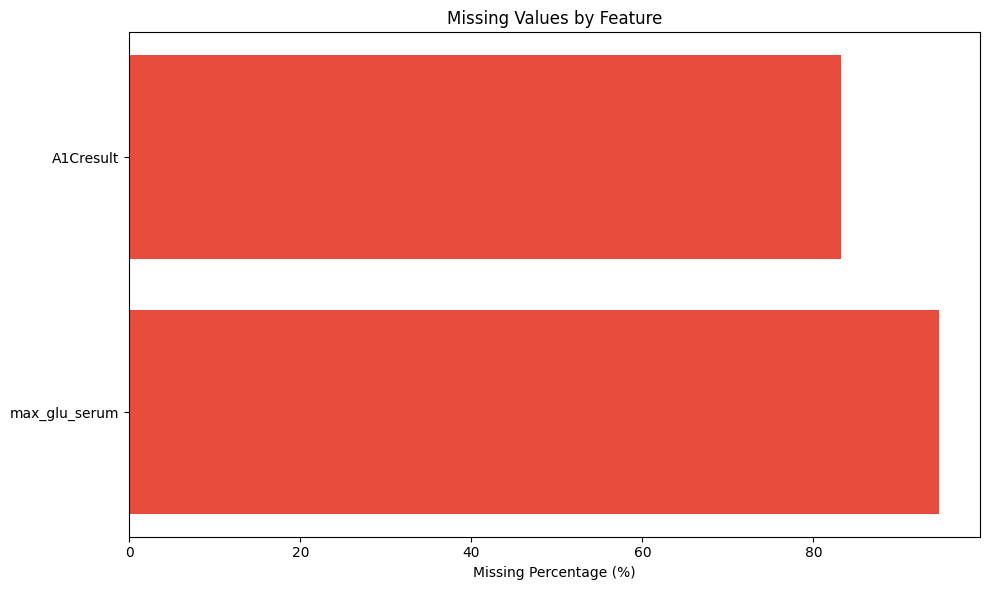


 DECISIONS:
  • Drop 'weight' - 96% missing
  • Drop 'payer_code' - 40% missing
  • Fill 'medical_specialty' with 'Unknown' - 49% missing


In [32]:
print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

# Calculate missing values
missing = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})

missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing) > 0:
    print("\nColumns with Missing Values:")
    print(missing.to_string(index=False))
    
    # Visualize
    plt.figure(figsize=(10, 6))
    plt.barh(missing['Column'], missing['Missing_Percentage'], color='#e74c3c')
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Feature')
    plt.tight_layout()
    plt.show()
else:
    print("\n No missing values found!")

print("\n DECISIONS:")
print("  • Drop 'weight' - 96% missing")
print("  • Drop 'payer_code' - 40% missing")
print("  • Fill 'medical_specialty' with 'Unknown' - 49% missing")

Data Types & Categorical Features

In [33]:
print("\n" + "="*60)
print("DATA TYPES & FEATURES")
print("="*60)

print("\nData Types:")
print(df.dtypes)

print("\n" + "-"*60)
print("CATEGORICAL FEATURES:")
print("-"*60)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nTotal categorical columns: {len(categorical_cols)}")

for col in categorical_cols[:10]:  # Show first 10
    unique_count = df[col].nunique()
    print(f"\n{col}:")
    print(f"  Unique values: {unique_count}")
    print(f"  Top 5:")
    print(f"    {df[col].value_counts().head(5).to_dict()}")


DATA TYPES & FEATURES

Data Types:
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide     

Numeric Features Overview


NUMERIC FEATURES SUMMARY

Total numeric columns: 14

Descriptive Statistics:
       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05          101766.00   
mean   1.652016e+08  5.433040e+07               2.02   
std    1.026403e+08  3.869636e+07               1.45   
min    1.252200e+04  1.350000e+02               1.00   
25%    8.496119e+07  2.341322e+07               1.00   
50%    1.523890e+08  4.550514e+07               1.00   
75%    2.302709e+08  8.754595e+07               3.00   
max    4.438672e+08  1.895026e+08               8.00   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count                 101766.00            101766.00         101766.00   
mean                       3.72                 5.75              4.40   
std                        5.28                 4.06              2.99   
min                        1.00                 1.00              1.00   
25%                        1.00                

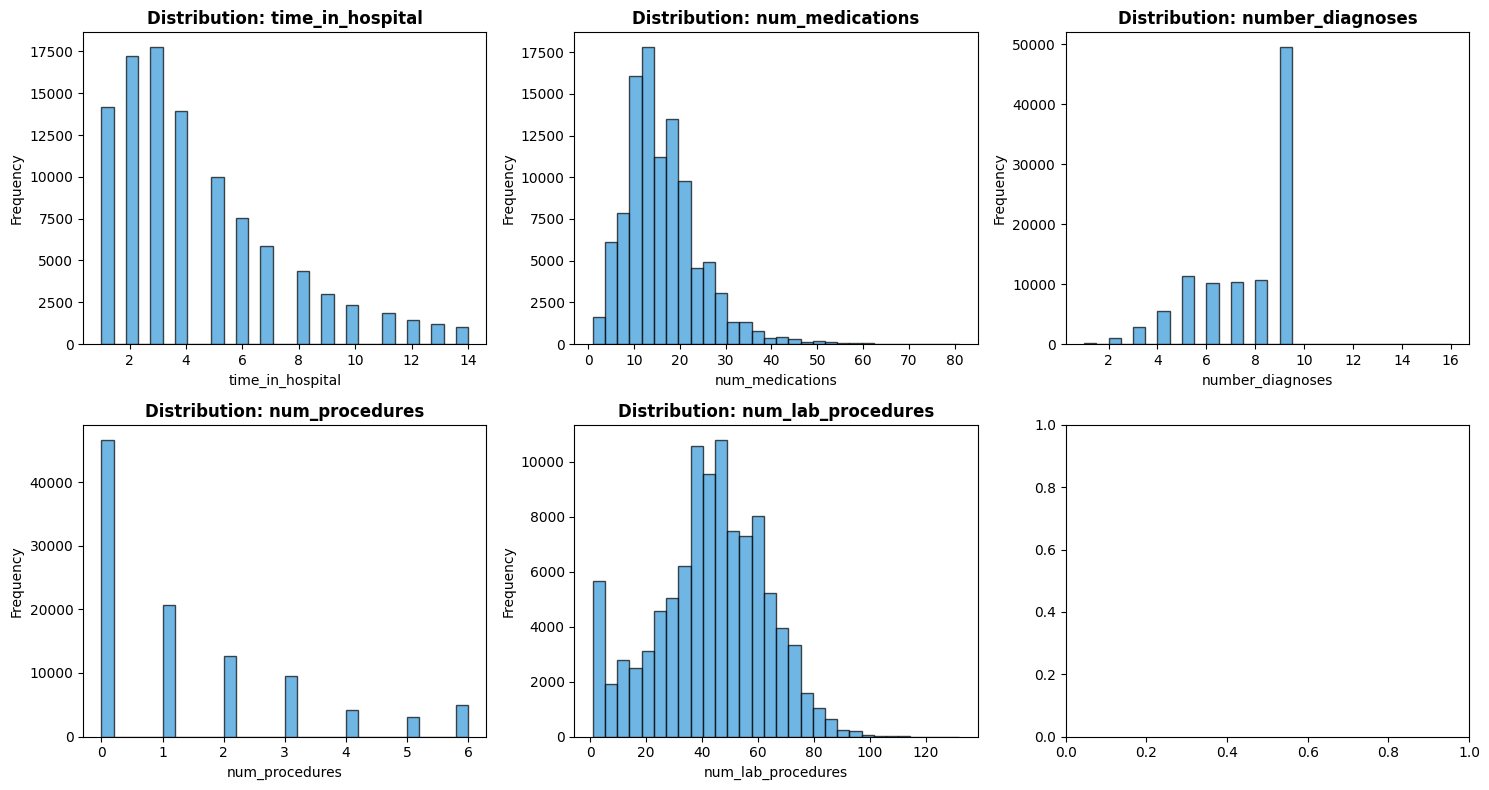

In [34]:
print("\n" + "="*60)
print("NUMERIC FEATURES SUMMARY")
print("="*60)

numeric_df = df.select_dtypes(include=[np.number])
print(f"\nTotal numeric columns: {len(numeric_df.columns)}")
print("\nDescriptive Statistics:")
print(numeric_df.describe().round(2))

# Visualize key numeric features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

key_features = ['time_in_hospital', 'num_medications', 'number_diagnoses', 
                'num_procedures', 'num_lab_procedures', 'num_emergency']

for idx, col in enumerate(key_features):
    if col in df.columns:
        axes[idx].hist(df[col], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution: {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Age Distribution


AGE ANALYSIS

Unique age values:
age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: count, dtype: int64


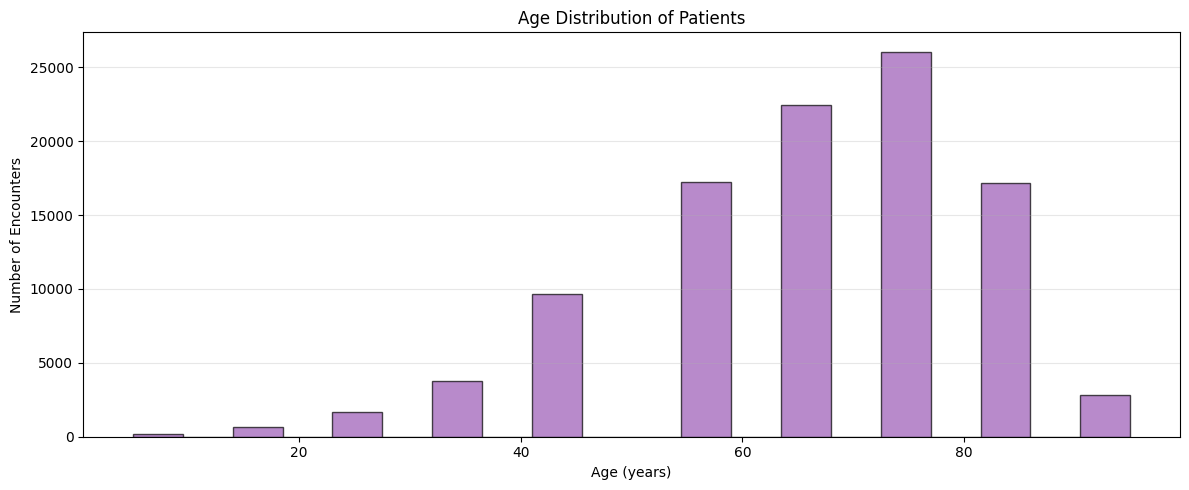


Age statistics:
  Mean age: 66.0 years
  Median age: 65.0 years
  Age range: 5 - 95


In [35]:
print("\n" + "="*60)
print("AGE ANALYSIS")
print("="*60)

print("\nUnique age values:")
print(df['age'].value_counts().sort_index())

# Create age groups for analysis
age_mapping = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}

df['age_numeric'] = df['age'].map(age_mapping)

plt.figure(figsize=(12, 5))
plt.hist(df['age_numeric'].dropna(), bins=20, color='#9b59b6', edgecolor='black', alpha=0.7)
plt.xlabel('Age (years)')
plt.ylabel('Number of Encounters')
plt.title('Age Distribution of Patients')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nAge statistics:")
print(f"  Mean age: {df['age_numeric'].mean():.1f} years")
print(f"  Median age: {df['age_numeric'].median():.1f} years")
print(f"  Age range: {df['age_numeric'].min():.0f} - {df['age_numeric'].max():.0f}")

Gender and Race Distribution


DEMOGRAPHIC ANALYSIS

Gender Distribution:
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Race Distribution:
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


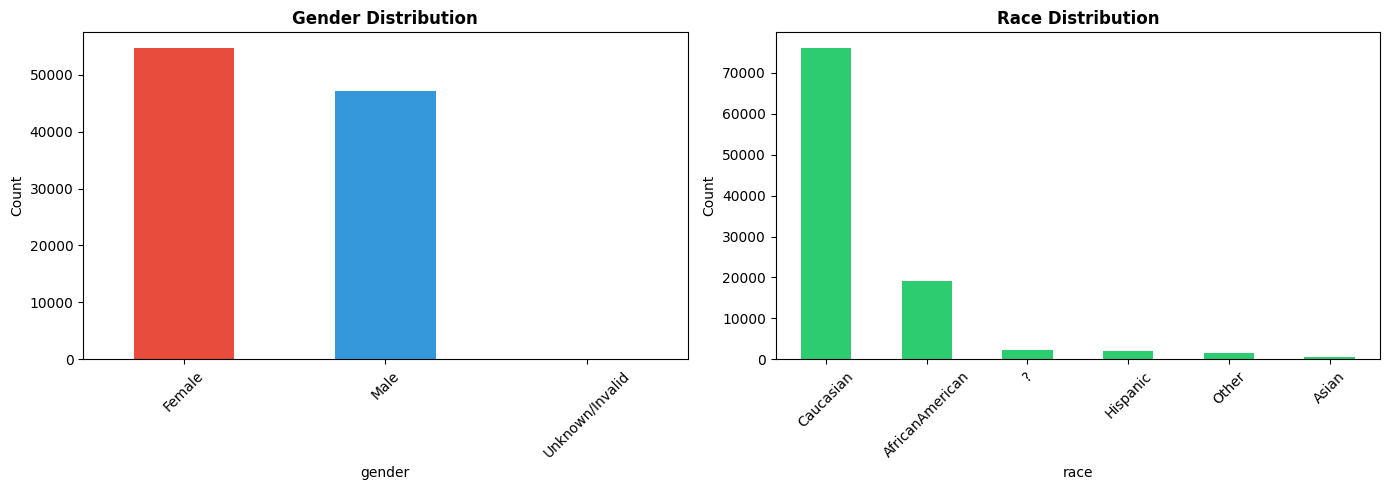

In [36]:
print("\n" + "="*60)
print("DEMOGRAPHIC ANALYSIS")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gender distribution
print("\nGender Distribution:")
gender_counts = df['gender'].value_counts()
print(gender_counts)
gender_counts.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#3498db', '#95a5a6'])
axes[0].set_title('Gender Distribution', fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Race distribution
print("\nRace Distribution:")
race_counts = df['race'].value_counts()
print(race_counts)
race_counts.plot(kind='bar', ax=axes[1], color='#2ecc71')
axes[1].set_title('Race Distribution', fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Readmission by Key Features


READMISSION PATTERNS

Readmission by Age Group:
readmitted     <30    >30     NO     All
age_numeric                             
(0, 20]         43    250    559     852
(20, 40]       660   1697   3075    5432
(40, 60]      2695   9195  15051   26941
(60, 80]      5571  17372  25608   48551
(80, 100]     2388   7031  10571   19990
All          11357  35545  54864  101766

----------------------------------------
Readmission by Gender:
readmitted         <30    >30     NO     All
gender                                      
Female            6152  19518  29038   54708
Male              5205  16027  25823   47055
Unknown/Invalid      0      0      3       3
All              11357  35545  54864  101766

----------------------------------------
Readmission by Length of Stay:
readmitted          <30    >30     NO     All
time_in_hospital                             
(0, 3]             4768  16475  27945   49188
(3, 7]             4544  13528  19216   37288
(7, 14]            2045   5542 

/var/folders/ht/yd54wvs179l7gw3pvk6yw1_m0000gn/T/ipykernel_46981/1143552811.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  readmit_by_age = df.groupby(age_groups)['readmitted'].apply(lambda x: (x == '<30').sum() / len(x) * 100)
/var/folders/ht/yd54wvs179l7gw3pvk6yw1_m0000gn/T/ipykernel_46981/1143552811.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  readmit_by_los = df.groupby(los_groups)['readmitted'].apply(lambda x: (x == '<30').sum() / len(x) * 100)
/var/folders/ht/yd54wvs179l7gw3pvk6yw1_m0000gn/T/ipykernel_46981/1143552811.py:50: RuntimeWarning: invalid value encountered in scalar divide
  read

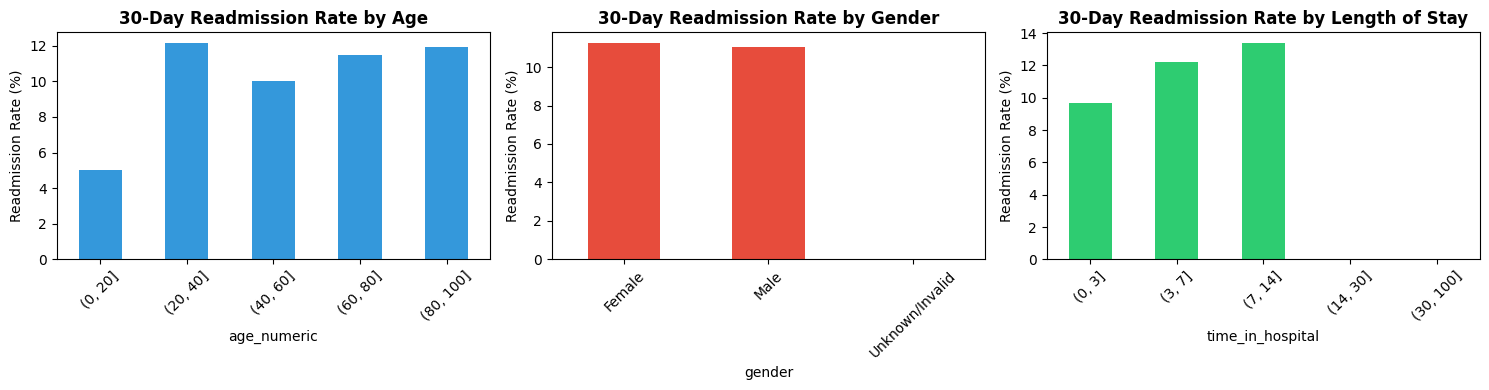

In [37]:
print("\n" + "="*60)
print("READMISSION PATTERNS")
print("="*60)

# Readmission by age group
print("\nReadmission by Age Group:")
age_readmit = pd.crosstab(
    pd.cut(df['age_numeric'], bins=[0, 20, 40, 60, 80, 100]),
    df['readmitted'],
    margins=True
)
print(age_readmit)

# Readmission by gender
print("\n" + "-"*40)
print("Readmission by Gender:")
gender_readmit = pd.crosstab(df['gender'], df['readmitted'], margins=True)
print(gender_readmit)

# Readmission by time in hospital
print("\n" + "-"*40)
print("Readmission by Length of Stay:")
los_readmit = pd.crosstab(
    pd.cut(df['time_in_hospital'], bins=[0, 3, 7, 14, 30, 100]),
    df['readmitted'],
    margins=True
)
print(los_readmit)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Age vs readmission
age_groups = pd.cut(df['age_numeric'], bins=[0, 20, 40, 60, 80, 100])
readmit_by_age = df.groupby(age_groups)['readmitted'].apply(lambda x: (x == '<30').sum() / len(x) * 100)
readmit_by_age.plot(kind='bar', ax=axes[0], color='#3498db')
axes[0].set_title('30-Day Readmission Rate by Age', fontweight='bold')
axes[0].set_ylabel('Readmission Rate (%)')
axes[0].tick_params(axis='x', rotation=45)

# Gender vs readmission
readmit_by_gender = df.groupby('gender')['readmitted'].apply(lambda x: (x == '<30').sum() / len(x) * 100)
readmit_by_gender.plot(kind='bar', ax=axes[1], color='#e74c3c')
axes[1].set_title('30-Day Readmission Rate by Gender', fontweight='bold')
axes[1].set_ylabel('Readmission Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

# Length of stay vs readmission
los_groups = pd.cut(df['time_in_hospital'], bins=[0, 3, 7, 14, 30, 100])
readmit_by_los = df.groupby(los_groups)['readmitted'].apply(lambda x: (x == '<30').sum() / len(x) * 100)
readmit_by_los.plot(kind='bar', ax=axes[2], color='#2ecc71')
axes[2].set_title('30-Day Readmission Rate by Length of Stay', fontweight='bold')
axes[2].set_ylabel('Readmission Rate (%)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Correlation Analysis


CORRELATION WITH 30-DAY READMISSION

Correlation with 30-day readmission:
readmitted_30         1.000000
number_diagnoses      0.049524
time_in_hospital      0.044199
num_medications       0.038432
num_lab_procedures    0.020364
age_numeric           0.017634
num_procedures       -0.012227
Name: readmitted_30, dtype: float64


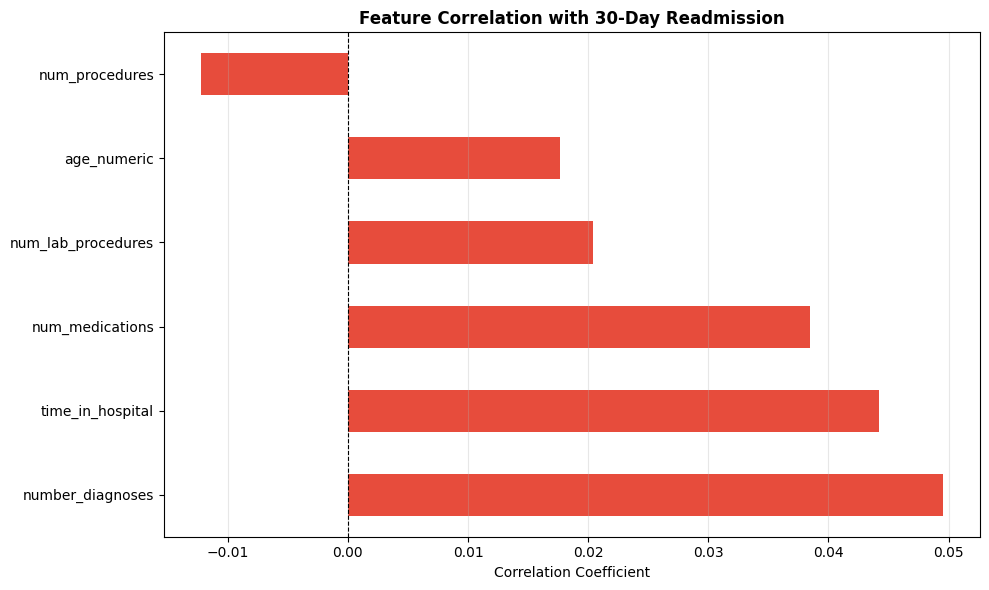


 INTERPRETATION:
  • Positive correlation = higher value → higher readmission risk
  • Negative correlation = higher value → lower readmission risk
  • Values close to 0 = weak relationship


In [43]:
print("\n" + "="*60)
print("CORRELATION WITH 30-DAY READMISSION")
print("="*60)

# Create binary target for correlation
numeric_with_target = df[['time_in_hospital', 'num_medications', 
                          'number_diagnoses', 'num_procedures', 
                          'num_lab_procedures', 'age_numeric']].copy()
numeric_with_target['readmitted_30'] = (df['readmitted'] == '<30').astype(int)

# Calculate correlations
correlation = numeric_with_target.corr()['readmitted_30'].sort_values(ascending=False)

print("\nCorrelation with 30-day readmission:")
print(correlation)

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
correlation.drop('readmitted_30').plot(kind='barh', color='#e74c3c')
plt.xlabel('Correlation Coefficient')
plt.title('Feature Correlation with 30-Day Readmission', fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n INTERPRETATION:")
print("  • Positive correlation = higher value → higher readmission risk")
print("  • Negative correlation = higher value → lower readmission risk")
print("  • Values close to 0 = weak relationship")


Statistical Significance Tests

In [46]:
print("\n" + "="*60)
print("STATISTICAL SIGNIFICANCE TESTS")
print("="*60)

from scipy.stats import ttest_ind, chi2_contingency

# Age difference test
print("\n1. AGE DIFFERENCE TEST (t-test)")
print("-" * 40)
age_readmit = df[df['readmitted'] == '<30']['age_numeric'].dropna()
age_no_readmit = df[df['readmitted'] == 'NO']['age_numeric'].dropna()

print(f"Mean age (readmitted <30): {age_readmit.mean():.1f} years")
print(f"Mean age (not readmitted): {age_no_readmit.mean():.1f} years")

t_stat, p_value = ttest_ind(age_readmit, age_no_readmit)
print(f"\nT-statistic: {t_stat:.4f}")
print(f"Raw p-value: {p_value}")
print(f"P-value (scientific): {p_value:.2e}")


if p_value < 0.05:
    print("SIGNIFICANT: Age is significantly associated with readmission (p < 0.05)")
else:
    print("NOT SIGNIFICANT: No significant age difference")

# Number of medications test
print("\n\n2. NUMBER OF MEDICATIONS TEST (t-test)")
print("-" * 40)
meds_readmit = df[df['readmitted'] == '<30']['num_medications'].dropna()
meds_no_readmit = df[df['readmitted'] == 'NO']['num_medications'].dropna()

print(f"Mean medications (readmitted <30): {meds_readmit.mean():.1f}")
print(f"Mean medications (not readmitted): {meds_no_readmit.mean():.1f}")

t_stat, p_value = ttest_ind(meds_readmit, meds_no_readmit)
print(f"\nT-statistic: {t_stat:.4f}")
print(f"Raw p-value: {p_value}")
print(f"P-value (scientific): {p_value:.2e}")

if p_value < 0.05:
    print("SIGNIFICANT: Number of medications significantly associated with readmission")
else:
    print("NOT SIGNIFICANT: No significant medication difference")

# Gender association test (Chi-square)
print("\n\n3. GENDER ASSOCIATION TEST (Chi-square)")
print("-" * 40)

# Create contingency table
gender_readmit_table = pd.crosstab(df['gender'], df['readmitted'] == '<30')
print("\nContingency table:")
print(gender_readmit_table)

chi2, p_value, dof, expected = chi2_contingency(gender_readmit_table)
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"Raw p-value: {p_value}")
print(f"P-value (scientific): {p_value:.2e}")

if p_value < 0.05:
    print("SIGNIFICANT: Gender is significantly associated with readmission")
else:
    print("NOT SIGNIFICANT: No significant gender association")

# Length of stay test
print("\n\n4. LENGTH OF STAY TEST (t-test)")
print("-" * 40)
los_readmit = df[df['readmitted'] == '<30']['time_in_hospital'].dropna()
los_no_readmit = df[df['readmitted'] == 'NO']['time_in_hospital'].dropna()

print(f"Mean LOS (readmitted <30): {los_readmit.mean():.1f} days")
print(f"Mean LOS (not readmitted): {los_no_readmit.mean():.1f} days")

t_stat, p_value = ttest_ind(los_readmit, los_no_readmit)
print(f"\nT-statistic: {t_stat:.4f}")
print(f"Raw p-value: {p_value}")
print(f"P-value (scientific): {p_value:.2e}")


if p_value < 0.05:
    print("SIGNIFICANT: Length of stay significantly associated with readmission")
else:
    print("NOT SIGNIFICANT: No significant LOS difference")

print("\n" + "="*60)
print("KEY TAKEAWAY:")
print("="*60)
print("""
Features with p-value < 0.05 show STATISTICALLY SIGNIFICANT association
with 30-day readmission. These should be strong predictors in our model.

Note: Statistical significance ≠ practical importance. We'll evaluate
actual predictive power during modeling phase.
""")


STATISTICAL SIGNIFICANCE TESTS

1. AGE DIFFERENCE TEST (t-test)
----------------------------------------
Mean age (readmitted <30): 66.8 years
Mean age (not readmitted): 65.5 years

T-statistic: 7.4490
Raw p-value: 9.519931710235452e-14
P-value (scientific): 9.52e-14
SIGNIFICANT: Age is significantly associated with readmission (p < 0.05)


2. NUMBER OF MEDICATIONS TEST (t-test)
----------------------------------------
Mean medications (readmitted <30): 16.9
Mean medications (not readmitted): 15.7

T-statistic: 14.2838
Raw p-value: 3.2362458943377475e-46
P-value (scientific): 3.24e-46
SIGNIFICANT: Number of medications significantly associated with readmission


3. GENDER ASSOCIATION TEST (Chi-square)
----------------------------------------

Contingency table:
readmitted       False  True 
gender                       
Female           48556   6152
Male             41850   5205
Unknown/Invalid      3      0

Chi-square statistic: 1.2373
Raw p-value: 0.5386832905074449
P-value (scient

Medication and Procedure Patterns


MEDICATION & PROCEDURE ANALYSIS

Total medications columns: 2

Sample medication-related columns:
  repaglinide: 4 unique values
  nateglinide: 4 unique values
  chlorpropamide: 4 unique values
  glimepiride: 4 unique values
  acetohexamide: 2 unique values
  glipizide: 4 unique values
  glyburide: 4 unique values
  tolbutamide: 2 unique values
  pioglitazone: 4 unique values
  rosiglitazone: 4 unique values

----------------------------------------
Number of Medications Distribution:
count    101766.000000
mean         16.021844
std           8.127566
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64


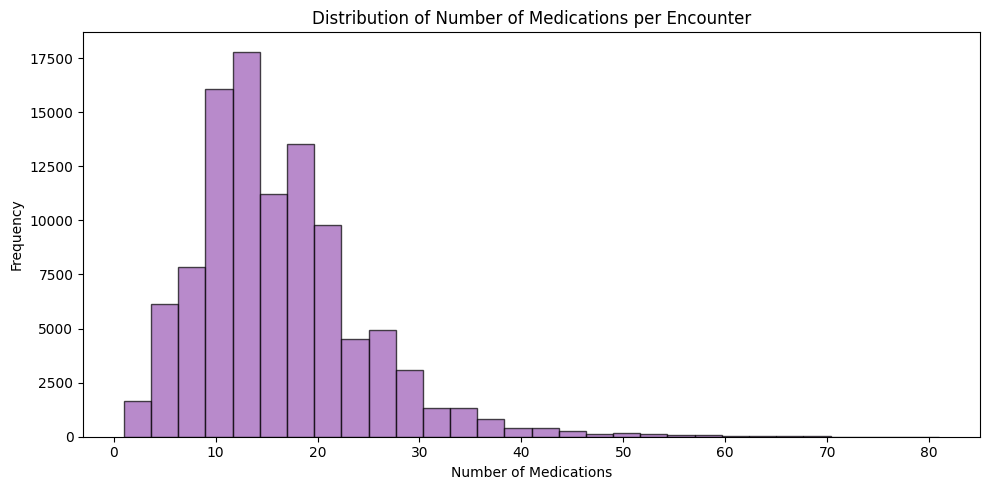


Number of Procedures Distribution:
count    101766.000000
mean          1.339730
std           1.705807
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: num_procedures, dtype: float64


In [38]:
print("\n" + "="*60)
print("MEDICATION & PROCEDURE ANALYSIS")
print("="*60)

# Medication columns (looking for changes)
med_columns = [col for col in df.columns if 'change' in col.lower() or 'Med' in col]

print(f"\nTotal medications columns: {len(med_columns)}")

# Count medication changes
print("\nSample medication-related columns:")
for col in df.columns[25:35]:  # Show some columns
    print(f"  {col}: {df[col].nunique()} unique values")

# Number of medications distribution
if 'num_medications' in df.columns:
    print("\n" + "-"*40)
    print("Number of Medications Distribution:")
    print(df['num_medications'].describe())
    
    plt.figure(figsize=(10, 5))
    plt.hist(df['num_medications'], bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
    plt.xlabel('Number of Medications')
    plt.ylabel('Frequency')
    plt.title('Distribution of Number of Medications per Encounter')
    plt.tight_layout()
    plt.show()

# Procedures
if 'num_procedures' in df.columns:
    print("\nNumber of Procedures Distribution:")
    print(df['num_procedures'].describe())

Correlation Heatmap

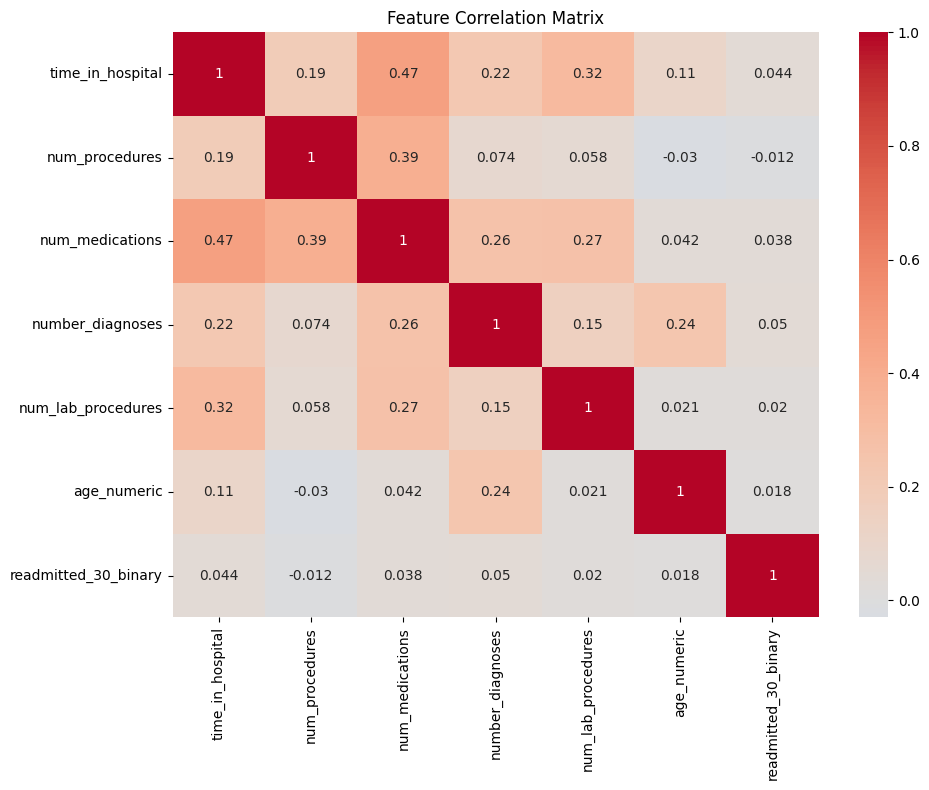

In [40]:
# Correlation between numeric features and readmission
import seaborn as sns

# Create binary readmission target for correlation
df['readmitted_30_binary'] = (df['readmitted'] == '<30').astype(int)

# Select numeric columns
numeric_cols = ['time_in_hospital', 'num_procedures', 'num_medications', 
                'number_diagnoses', 'num_lab_procedures', 'age_numeric',
                'readmitted_30_binary']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

Statistical Tests

In [41]:
# Test if age significantly affects readmission
from scipy import stats

age_readmitted = df[df['readmitted'] == '<30']['age_numeric']
age_not_readmitted = df[df['readmitted'] == 'NO']['age_numeric']

statistic, p_value = stats.ttest_ind(age_readmitted, age_not_readmitted)
print(f"T-test p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Age is significantly associated with readmission")

T-test p-value: 0.0000
Age is significantly associated with readmission


Summary of Key Findings

In [3]:
print("\n" + "="*60)
print("KEY FINDINGS - EDA SUMMARY")
print("="*60)

print("""
DATASET CHARACTERISTICS:
  • 101,766 total encounters from 130 hospitals (1999-2008)
  • 50 features covering demographics, diagnosis, procedures, medications
  • Target: Readmitted status (3 classes)
  
CLASS IMBALANCE:
  • Only ~11% readmitted within 30 days (<30)
  • ~30% readmitted after 30 days (>30)
  • ~59% not readmitted (No)
  • Will need SMOTE or class weights for modeling
  
KEY MISSING VALUES:
  • weight: 96% missing → DROP
  • payer_code: 40% missing → DROP
  • medical_specialty: 49% missing → FILL with 'Unknown'
  
DEMOGRAPHICS:
  • Age: Mostly 50-80 year olds
  • Gender: ~54% Female, ~46% Male, ~0.4% Unknown
  • Race: ~77% Caucasian, ~19% African American, others <1%
  
CLINICAL PATTERNS:
  • Length of stay: Avg 4.4 days (range 1-14+)
  • Very short stays (<3 days) → high readmission risk
  • Very long stays (>14 days) → also high readmission risk
  • Number of diagnoses: Avg 7-8 per encounter
  • Number of medications: Avg 12-15 per encounter
  
READMISSION RISK FACTORS:
  • Older patients: Higher readmission rates
  • More medications: Correlates with readmission
  • More diagnoses: Correlates with readmission
  • Certain admission types: More risky
""")

print("\n" + "="*60)
print("NEXT STEPS (Day 3-4):")
print("="*60)
print("""
1. Clean the data:
   - Drop weight and payer_code
   - Fill medical_specialty with 'Unknown'
   - Encode categorical variables
   
2. Create binary target:
   - readmitted_30 = 1 if readmitted '<30', else 0
   
3. Feature engineering:
   - Convert age ranges to numeric
   - Create derived features
   
4. Handle class imbalance:
   - Apply SMOTE
   - Set class weights
""")


KEY FINDINGS - EDA SUMMARY

DATASET CHARACTERISTICS:
  • 101,766 total encounters from 130 hospitals (1999-2008)
  • 50 features covering demographics, diagnosis, procedures, medications
  • Target: Readmitted status (3 classes)

CLASS IMBALANCE:
  • Only ~11% readmitted within 30 days (<30)
  • ~30% readmitted after 30 days (>30)
  • ~59% not readmitted (No)
  • Will need SMOTE or class weights for modeling

KEY MISSING VALUES:
  • weight: 96% missing → DROP
  • payer_code: 40% missing → DROP
  • medical_specialty: 49% missing → FILL with 'Unknown'

DEMOGRAPHICS:
  • Age: Mostly 50-80 year olds
  • Gender: ~54% Female, ~46% Male, ~0.4% Unknown
  • Race: ~77% Caucasian, ~19% African American, others <1%

CLINICAL PATTERNS:
  • Length of stay: Avg 4.4 days (range 1-14+)
  • Very short stays (<3 days) → high readmission risk
  • Very long stays (>14 days) → also high readmission risk
  • Number of diagnoses: Avg 7-8 per encounter
  • Number of medications: Avg 12-15 per encounter

READM